In [2]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [3]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

# Read the CSV and Perform Basic Data Cleaning

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [7]:
df.shape

(6991, 41)

# Create a Train Test Split

Use `koi_disposition` for the y values

In [8]:
X = df.drop("koi_disposition", axis=1)
y = df["koi_disposition"] #y.values.reshape(-1, 1)
print(X.shape, y.shape)

(6991, 40) (6991,)


In [10]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
3563,0,0,0,0,10.548413,5.470000e-05,-5.470000e-05,139.064020,0.004110,-0.004110,...,-133,4.387,0.066,-0.123,1.092,0.181,-0.097,298.09543,44.737061,13.204
4099,0,0,0,0,24.754385,1.365000e-04,-1.365000e-04,140.207320,0.004460,-0.004460,...,-144,4.519,0.078,-0.052,0.804,0.056,-0.076,295.73535,42.576248,15.514
5460,0,0,0,0,1.057336,1.230000e-07,-1.230000e-07,131.792007,0.000096,-0.000096,...,-140,4.594,0.054,-0.027,0.683,0.054,-0.060,292.18417,49.310040,15.414
1091,0,0,0,0,201.118319,1.461000e-03,-1.461000e-03,187.569860,0.005290,-0.005290,...,-112,4.447,0.072,-0.108,0.954,0.135,-0.083,283.11377,48.131390,13.328
5999,0,0,0,0,91.649983,3.181000e-03,-3.181000e-03,175.715600,0.028600,-0.028600,...,-233,4.145,0.164,-0.164,1.608,0.905,-0.383,294.93198,39.812420,12.964


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [12]:
# Scale your data
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [14]:
from tensorflow.keras.utils import to_categorical

# One-hot encoding
# YOUR CODE HERE
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [ ]:
for label, original_class in zip(y_train_categorical, y):
    print('Original Class: ' + str(original_class))
    print('Encoded Label: ' + str(label))
    print('-' * 12)

In [15]:
print(X_train_scaled.shape, y_train_categorical.shape)
df_y_train = pd.DataFrame(y_train_categorical)
df_y_train

(5243, 40) (5243, 3)


,0,1,2
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
...,...,...,...
5238,0.0,1.0,0.0
5239,0.0,0.0,1.0
5240,0.0,0.0,1.0
5241,0.0,1.0,0.0


# Select your features (columns)

In [16]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit_transform(X_train_scaled)
selector.fit_transform(y_train_categorical)
print(X_train_scaled.shape, y_train_categorical.shape)

(5243, 40) (5243, 3)


In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
select = SelectKBest(chi2, k=7)
train_new_xy = select.fit_transform(X_train_scaled, y_train_categorical)
filter = select.get_support()
cols = df.columns.array
features = cols[1:]
print(features)
print(features[filter])
X_train_scaled.shape


<PandasArray>
[    'koi_fpflag_nt',     'koi_fpflag_ss',     'koi_fpflag_co',
     'koi_fpflag_ec',        'koi_period',   'koi_period_err1',
   'koi_period_err2',       'koi_time0bk',  'koi_time0bk_err1',
  'koi_time0bk_err2',        'koi_impact',   'koi_impact_err1',
   'koi_impact_err2',      'koi_duration', 'koi_duration_err1',
 'koi_duration_err2',         'koi_depth',    'koi_depth_err1',
    'koi_depth_err2',          'koi_prad',     'koi_prad_err1',
     'koi_prad_err2',           'koi_teq',         'koi_insol',
    'koi_insol_err1',    'koi_insol_err2',     'koi_model_snr',
  'koi_tce_plnt_num',         'koi_steff',    'koi_steff_err1',
    'koi_steff_err2',         'koi_slogg',    'koi_slogg_err1',
    'koi_slogg_err2',          'koi_srad',     'koi_srad_err1',
     'koi_srad_err2',                'ra',               'dec',
        'koi_kepmag']
Length: 40, dtype: object
<PandasArray>
[   'koi_fpflag_nt',    'koi_fpflag_ss',    'koi_fpflag_co',
    'koi_fpflag_ec',        'ko

(5243, 40)

In [18]:
#In X keep only cols 
# koi_fpflag_nt is 0,koi_fpflag_ss is 1, koi_fpflag_co is 2, koi_fpflag_ec is 3, 
# koi_depth' is 16, 'koi_model_snr is 26',koi_tce_plnt_num is 27
X_train_featured = X_train_scaled[:, [0,1,2,3,16,26,27]]
X_test_featured = X_test_scaled[:, [0,1,2,3,16,26,27]]
X_train_featured_df = pd.DataFrame(X_train_featured)
X_train_featured_df 

,0,1,2,3,4,5,6
0,0.0,0.0,0.0,0.0,0.000062,0.001116,0.142857
1,0.0,0.0,0.0,0.0,0.000380,0.001812,0.000000
2,0.0,0.0,0.0,0.0,0.030706,0.052402,0.000000
3,0.0,0.0,0.0,0.0,0.000375,0.003656,0.000000
4,0.0,0.0,0.0,0.0,0.000121,0.000784,0.142857
...,...,...,...,...,...,...,...
5238,0.0,0.0,0.0,0.0,0.000357,0.002651,0.000000
5239,1.0,0.0,0.0,0.0,0.000069,0.004429,0.000000
5240,0.0,0.0,1.0,0.0,0.006409,0.031194,0.000000
5241,0.0,0.0,0.0,0.0,0.000512,0.002773,0.142857


In [19]:
print(X_train_featured.shape, y_train_categorical.shape)
print(X_test_featured.shape, y_test_categorical.shape)

(5243, 7) (5243, 3)
(1748, 7) (1748, 3)


In [20]:
X_train_featured.shape
y_train_categorical.shape

(5243, 3)

# Train the Model

In [21]:
# First, create a normal neural network with 2 inputs, 6 hidden nodes, and 3 outputs
# YOUR CODE HERE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=7, activation='relu', input_dim=7))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 100)               800       
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 3)                 303       
                                                                 
Total params: 31,459
Trainable params: 31,459
Non-traina

In [22]:
# Compile the model
# YOUR CODE HERE
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
y_train_categorical.reshape(-1, 1)
y_test_categorical.reshape(-1, 1)

print(X_train_featured.shape, y_train_categorical.shape)
print(X_test_featured.shape, y_test_categorical.shape)

(5243, 7) (5243, 3)
(1748, 7) (1748, 3)


In [24]:
# Fit the model to the training data
# YOUR CODE HERE

model.fit(
    X_train_featured,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)

Epoch 1/100
164/164 - 1s - loss: 0.5097 - accuracy: 0.7009 - 534ms/epoch - 3ms/step
Epoch 2/100
164/164 - 0s - loss: 0.4060 - accuracy: 0.7490 - 112ms/epoch - 685us/step
Epoch 3/100
164/164 - 0s - loss: 0.4089 - accuracy: 0.7482 - 120ms/epoch - 729us/step
Epoch 4/100
164/164 - 0s - loss: 0.4045 - accuracy: 0.7454 - 137ms/epoch - 835us/step
Epoch 5/100
164/164 - 0s - loss: 0.4017 - accuracy: 0.7622 - 113ms/epoch - 690us/step
Epoch 6/100
164/164 - 0s - loss: 0.4016 - accuracy: 0.7543 - 114ms/epoch - 697us/step
Epoch 7/100
164/164 - 0s - loss: 0.4011 - accuracy: 0.7530 - 108ms/epoch - 660us/step
Epoch 8/100
164/164 - 0s - loss: 0.4006 - accuracy: 0.7541 - 111ms/epoch - 676us/step
Epoch 9/100
164/164 - 0s - loss: 0.4018 - accuracy: 0.7557 - 113ms/epoch - 691us/step
Epoch 10/100
164/164 - 0s - loss: 0.4002 - accuracy: 0.7612 - 117ms/epoch - 713us/step
Epoch 11/100
164/164 - 0s - loss: 0.3986 - accuracy: 0.7612 - 113ms/epoch - 687us/step
Epoch 12/100
164/164 - 0s - loss: 0.3986 - accuracy: 0

In [161]:
model_loss, model_accuracy = model.evaluate(X_train_featured, y_train_categorical, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

164/164 - 0s - loss: 0.2843 - accuracy: 0.8762 - 264ms/epoch - 2ms/step
Normal Neural Network - Loss: 0.28433868288993835, Accuracy: 0.876215934753418


In [162]:
print(f"Training Data Score: {model.evaluate(X_train_featured, y_train_categorical)}")
print(f"Testing Data Score: {model.evaluate(X_test_featured, y_test_categorical)}")

164/164 [==============================] - 0s 746us/step - loss: 0.2843 - accuracy: 0.8762
Training Data Score: [0.28433868288993835, 0.876215934753418]
55/55 [==============================] - 0s 783us/step - loss: 0.2883 - accuracy: 0.8896
Testing Data Score: [0.2882985770702362, 0.8895881175994873]


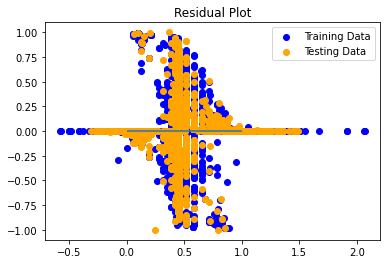

In [26]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
modelLG = LinearRegression()
modelLG.fit(X_train_featured, y_train_categorical)
### END SOLUTION

# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
predictions = modelLG.predict(X_test_featured)

plt.scatter(modelLG.predict(X_train_featured), y_train_categorical - model.predict(X_train_featured), c="blue", label="Training Data")
plt.scatter(modelLG.predict(X_test_featured), y_test_categorical - model.predict(X_test_featured), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_categorical.min(), xmax=y_test_categorical.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [16]:
# Use Pandas get_dummies to convert y categorical data into 1d array

### BEGIN SOLUTION
df_ht = pd.get_dummies(df)
df_ht.head()
### END SOLUTION

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_disposition_CANDIDATE,koi_disposition_CONFIRMED,koi_disposition_FALSE POSITIVE
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,0,1,0
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,0,0,1
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0,0,1
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,0,1,0
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714,0,1,0


In [17]:
# Drop extra dummy columns
df_ht = df_ht.drop(columns=['koi_disposition_FALSE POSITIVE','koi_disposition_CONFIRMED'])
df_ht.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_disposition_CANDIDATE
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,0
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,0
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,0
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714,0


In [55]:
# Assign "koi_disposition_CANDIDATE" to y target and other columns to X data
X_data = df_ht.drop("koi_disposition_CANDIDATE", axis=1)

y_target = df_ht['koi_disposition_CANDIDATE'].values.reshape(-1,1)
feature_names = X_data.columns
print(X_data.shape,y_target.shape)

(6991, 40) (6991, 1)


In [52]:
#In X_data keep only cols 
# koi_fpflag_nt is 0,koi_fpflag_ss is 1, koi_fpflag_co is 2, koi_fpflag_ec is 3, 
# koi_depth' is 16, 'koi_model_snr is 26',koi_tce_plnt_num is 27
#X_data_featured = X_data.iloc[:, [0,1,2,3,16,26,27]]
X_data_featured = X_data.iloc[:,[0,1,2,3]]
print(X_data_featured.shape,y_target.shape)

(6991, 4) (6991,)


In [35]:
# Split data and target into training and testing
from sklearn.model_selection import train_test_split
X_data_train, X_data_test, y_target_train, y_target_test = train_test_split(X_data_featured, y_target, random_state=42)
print(X_data_train.shape,y_target_train.shape)
print(X_data_test.shape,y_target_test.shape)

(5243, 4) (5243,)
(1748, 4) (1748,)


In [36]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
# Create the SVC Model
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
model_SVC = SVC()
model_SVC

SVC()

In [37]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model_SVC, parameters)

# Train the model with GridSearch
grid.fit(X_data_train, y_target_train)

print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}
0.7566279044382509


In [27]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_data_test)

In [28]:
print('Test Acc: %.3f' % grid.score(X_data_test, y_target_test))

Test Acc: 0.765


In [50]:
# Calculate classification report
from sklearn.metrics import classification_report
target_names = ["negative", "positive"] # CANDIDATE OR NOT
print(classification_report(y_target_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.76      1.00      0.87      1337
    positive       0.00      0.00      0.00       411

    accuracy                           0.76      1748
   macro avg       0.38      0.50      0.43      1748
weighted avg       0.59      0.76      0.66      1748



C:\Users\antoi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\antoi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\antoi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The f1-score gives you the harmonic mean of precision and recall. The scores corresponding to every class will tell you the accuracy of the classifier in classifying the data points in that particular class compared to all other classes.

The support is the number of samples of the true response that lie in that class.

In [33]:
df_grid = pd.DataFrame(grid.cv_results_)
df_grid[['param_C','param_kernel','mean_test_score']]


,param_C,param_kernel,mean_test_score
0,1,linear,0.756628
1,1,rbf,0.756628
2,1,linear,0.756628
3,1,rbf,0.756628
4,1,linear,0.756628
5,1,rbf,0.756628
6,1,linear,0.756628
7,1,rbf,0.756628
8,5,linear,0.756628
9,5,rbf,0.756628


In [46]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [47]:

model_params = {
    'svm' : {
        'model' : svm.SVC(gamma='auto'),
        'params' : {
            'C' : [1,5,10,50],
            'kernel': ['rbf','linear'],
            'gamma': [0.0001, 0.0005, 0.001, 0.005]
        }
    },
    'random_forest': {
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,50]
        }
    },
    'logistic_regression' : {
    'model' : LogisticRegression(solver='liblinear',multi_class='auto'),
    'params' : { 'C': [1,5,10,50]
    }
  }
}

In [48]:
scores= []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_data_train, y_target_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_})

In [49]:
df_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_score

,model,best_score,best_params
0,svm,0.756628,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}"
1,random_forest,0.757584,{'n_estimators': 1}
2,logistic_regression,0.756628,{'C': 1}


# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'antoinetteboyle.sav'
joblib.dump(model, filename)